In [1]:
import pandas as pd
import quickplot as qplt
from defillama2 import DefiLlama
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 50)
pd.options.display.float_format = '{:,.4f}'.format

%matplotlib inline
plt.style.use("fivethirtyeight")

# Makes graphs crisp. Only use if you don't have a lot of points/lines on your graph.
%config InlineBackend.figure_formats = ['svg', 'retina'] # use svg, then retina if svg is not supported

In [2]:
df = obj.get_pools_yields() # See https://defillama.com/yields for the meaning of columns.
print(df.shape)
df.head() 

NameError: name 'obj' is not defined

In [4]:
df.columns

NameError: name 'df' is not defined

In [7]:
# let's look at TriCrypto pools on Ethereum and Arbitrum, discarding outlier pools (with extreme APYs and usually low TVL)
is_true = (df.symbol.isin(['yvCurve-Tricrypto', 'USDT-WBTC-WETH', 'WBTC-WETH-USDC']) & 
           df.chain.isin(['Ethereum', 'Arbitrum']) & 
           (~df.outlier))

# I guess columns `mu` and `sigma` are mean and standard deviation of past APYs over `count` many APYs.
# `apyPct7D` is pct change in APY for the last 7 days; `apyPct30D` is NaN for all records.
# `predictedClass` is DeFiLlama's prediction on which way the APY is heading to. 
cols = ['chain', 'project', 'symbol', 'tvlUsd', 'apyBase', 'apyReward', 'apy', 'apyPct7D', 
        'mu', 'sigma', 'count', 'predictedClass', 'predictedProbability']
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apyReward,apy,apyPct7D,mu,sigma,count,predictedClass,predictedProbability
742,Ethereum,concentrator,USDT-WBTC-WETH,5513870,NaN,NaN,15.8300,-4.3900,18.3537,0.6058,163,Down,83.0000
44,Ethereum,convex-finance,USDT-WBTC-WETH,200773672,0.9498,8.1332,9.0830,-3.3561,14.0346,0.4138,209,Stable/Up,70.0000
4325,Arbitrum,pickle,USDT-WBTC-WETH,200688,NaN,NaN,8.2870,-2.7003,10.0711,0.1628,178,Stable/Up,58.0000
41,Ethereum,curve,USDT-WBTC-WETH,210531385,0.9498,4.0100,4.9598,-2.3337,8.4444,0.1925,266,Stable/Up,95.0000
650,Arbitrum,balancer,WBTC-WETH-USDC,6756165,2.3632,2.4103,4.7735,-11.6298,15.3579,0.3094,265,Stable/Up,77.0000
362,Arbitrum,curve,USDT-WBTC-WETH,15195553,1.7561,0.0000,1.7561,-1.6350,1.4102,0.0510,222,Down,69.0000
3278,Ethereum,curve,USDT-WBTC-WETH,380506,0.2960,0.0000,0.2960,-0.4637,0.6989,0.0463,222,Stable/Up,76.0000
7581,Ethereum,convex-finance,USDT-WBTC-WETH,36038,0.2960,0.0000,0.2960,-0.2718,1.0813,0.0725,98,Stable/Up,51.0000


In [8]:
# let's find multi-sided stablecoin pools without IL and with TVL > $1M on Arbitrum
is_true = (df.chain == 'Arbitrum') & df.stablecoin & (df.ilRisk == 'no') & (df.exposure == 'multi') & (df.tvlUsd > 1e6) & (~df.outlier)
df.loc[is_true, cols].sort_values('apy', ascending=False)

,chain,project,symbol,tvlUsd,apyBase,apyReward,apy,apyPct7D,mu,sigma,count,predictedClass,predictedProbability
1015,Arbitrum,uniswap-v3,USDT-USDC,3296098,3.2498,NaN,3.2498,-5.8972,1.0193,0.1271,220,Down,53.0000
1153,Arbitrum,uniswap-v3,DAI-USDC,2728045,2.6060,NaN,2.6060,-5.3877,1.0038,0.1377,220,Down,51.0000
1426,Arbitrum,curve,FRAX-USDC,1965712,0.7137,0.0000,0.7137,-1.1115,1.0044,0.0626,97,Stable/Up,57.0000
1056,Arbitrum,uniswap-v3,USDS-USDC,3161940,0.3538,NaN,0.3538,-0.3184,0.1912,0.0256,220,Down,56.0000
424,Arbitrum,curve,VST-FRAX,12409449,0.2292,0.0000,0.2292,0.0992,0.2311,0.0141,107,Stable/Up,54.0000
246,Arbitrum,curve,USDC-USDT,26081505,0.1333,0.0000,0.1333,-0.0259,0.1504,0.0106,222,Down,56.0000
1453,Arbitrum,uniswap-v3,TUSD-USDC,1903489,0.0000,NaN,0.0000,0.0000,0.0014,0.0004,105,None,NaN
1500,Arbitrum,uniswap-v3,USDD-USDC,1804867,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,105,None,NaN


## Get historical APY and TVL of a pool

In [2]:
obj = DefiLlama()

In [3]:
# get pool ids
dat = obj.get_pools_yields()
pool_ids = dat.pool
pool_ids

0       747c1d2a-c668-4682-b9f9-296708a3dd90
1       051c1a54-df05-4bc4-9d73-c17508acae23
2       71418c17-d2aa-4eff-b68a-806fff9ec951
3       57d30b9c-fc66-4ac2-b666-69ad5f410cce
4       0e458a5b-fd99-4667-8706-dd938934cb0c
                        ...                 
9975    483cd298-5ae5-4576-8b67-1c3d1ba98157
9976    73b0e9e9-c358-48b1-a382-0ec051b27695
9977    8e91c2b5-1a00-4579-ac06-7036fe83cefa
9978    a996fae6-0c8c-442a-94aa-20e1adf0a4c9
9979    f2e81bd6-f410-452b-8983-7c56dc49422e
Name: pool, Length: 9980, dtype: object

In [4]:
pool_id = pool_ids[10]
meta = dat.loc[dat.pool == pool_id, ['chain', 'project', 'symbol']]
meta

,chain,project,symbol
10,Ethereum,curve,FRAX-USDC


In [5]:
df = obj.get_pool_hist_apy(pool_id)
df.head()

,tvlUsd,apy,apyBase,apyReward
date,,,,
2022-07-20,"372,228,682.0000",3.6623,0.2130,3.4493
2022-07-21,"375,740,673.0000",4.4075,0.3515,4.0560
2022-07-22,"381,982,059.0000",4.2450,0.0759,4.1691
2022-07-23,"389,592,835.0000",4.0908,0.1751,3.9157
2022-07-24,"395,236,172.0000",3.9079,0.0805,3.8273


In [6]:
fig_tit = ', '.join(meta.values.tolist()[0])
print(fig_tit)

Ethereum, curve, FRAX-USDC


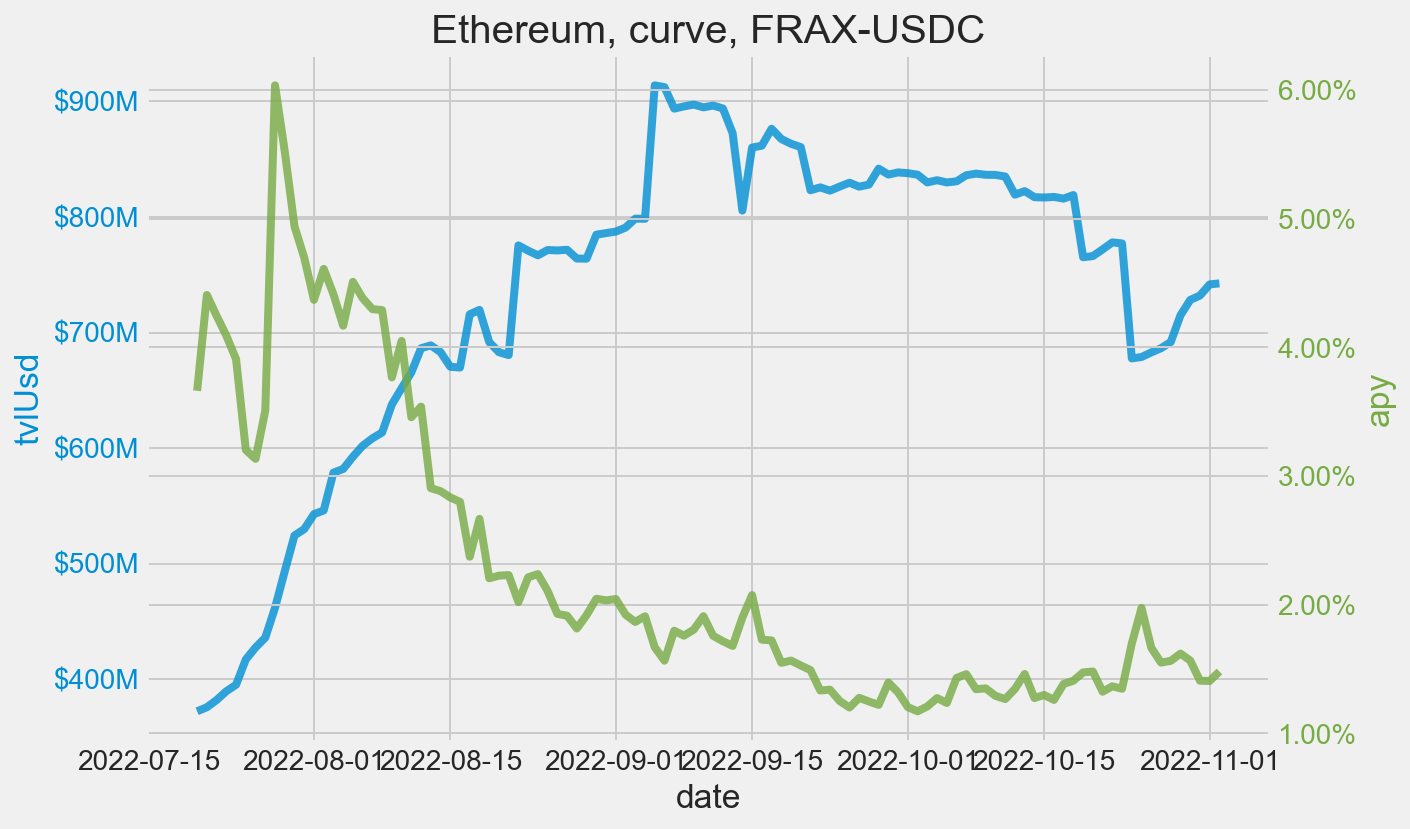

In [7]:
# plot both TVL and APY over time to see their relationships. 
qplt.lineplot_double_yaxes(df, 'tvlUsd', 'apy', left_y_as_usd=True, right_y_as_pct=True, right_y_decimals=2, 
                           title = fig_tit, height=6)
plt.savefig('dual_yaxes01.png', dpi=300)

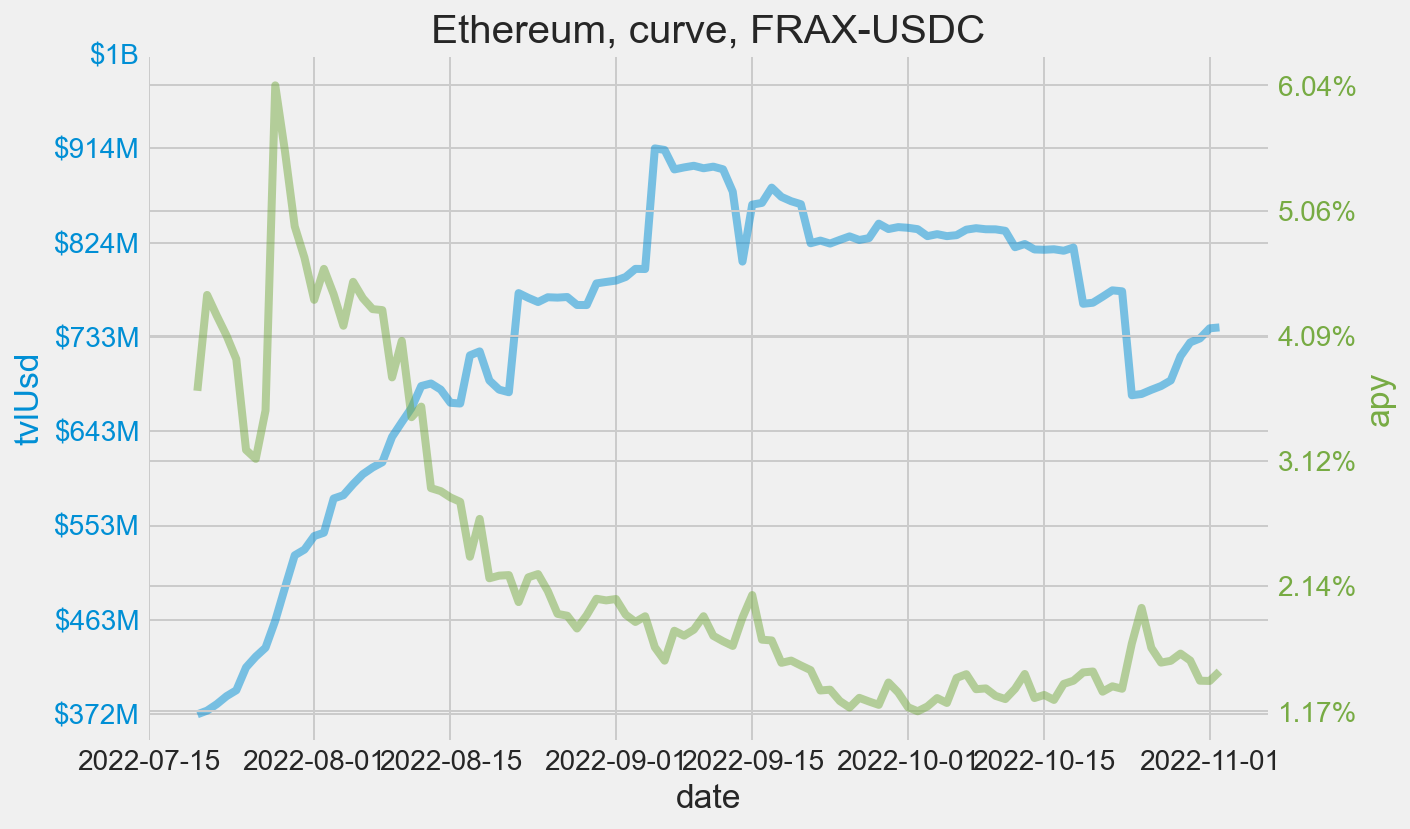

In [11]:
# change the number of left and right y-ticks and transparency level of the curves 
qplt.lineplot_double_yaxes(df, 'tvlUsd', 'apy', left_y_as_usd=True, right_y_as_pct=True, right_y_decimals=2, 
                           right_yticks=5, left_yticks=6, title = fig_tit, alpha=0.5, height=6)
plt.savefig('dual_yaxes02.png', dpi=300)

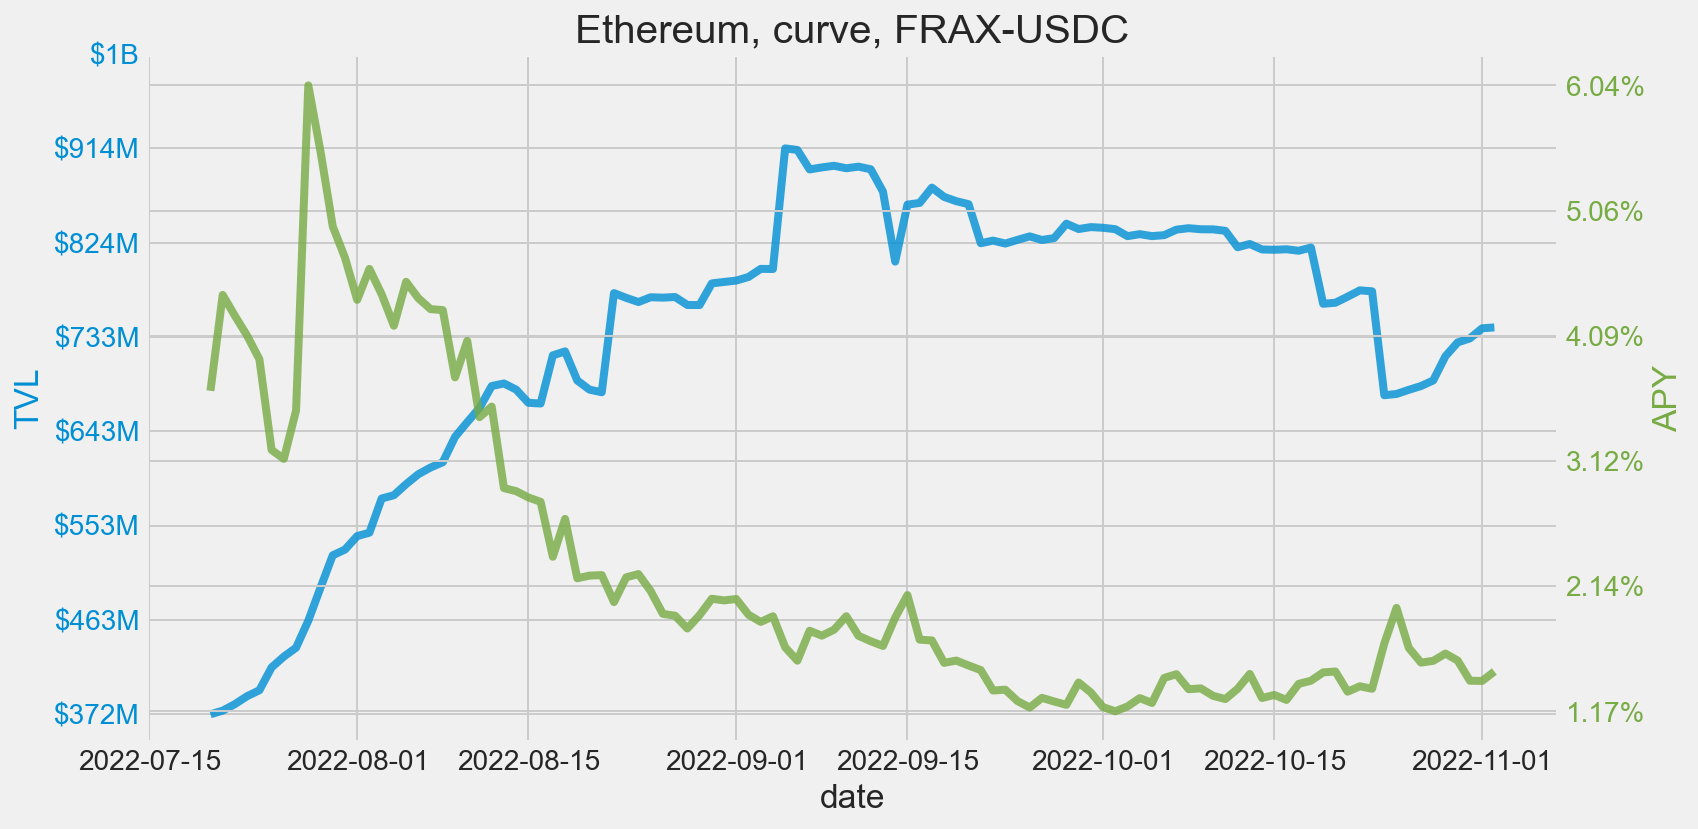

In [10]:
# give xlabel, left and right labels
qplt.lineplot_double_yaxes(df, 'tvlUsd', 'apy', xlab='', left_ylab='TVL', right_ylab='APY',
                           left_y_as_usd=True, right_y_as_pct=True, right_y_decimals=2, 
                           right_yticks=5, left_yticks=6, title = fig_tit, width=12, height=6)
plt.savefig('dual_yaxes03.png', dpi=300)